# Programming for Data Analysis: Simulating Real World Phenomenom

Author: Julian Dunne g00267940@gmit.ie

Create a data set by simulating a real-world phenomenon. Model and synthesise the data using Python. Use the numpy.random package for this purpose. The project should include:

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

- Investigate the types of variables involved, their likely distributions, and their relationships with each other.

- Synthesise/simulate a data set as closely matching their properties as possible.

- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

# Project plan:

Cardiovascular disease will be the subject for this project. The reason for choosing this topic is that there is many variables that noticeably increase the likelihood of developing heart disease and that these variables should be very useful for simulating a data set to demonstrate this real world phenomenom. 

# Project Assumptions for Cardiovascular Disease

Cardiovascular disease includes all diseases of the heart and circulation but most commonly it refers to coronary heart disease (angina, heart attack), stroke and other blood vessel diseases. Other conditions include congenital heart disease, heart valve disease and disease of the heart muscle (cardiomyopathy) <b>insert reference here for irish heart foundation pdf by June Shannon 1stNo2018</b>. For the puposes of this project it will be assumed that all Cardiovascular diseases are the same disease. 

According to <b> insert reference https://www.medicinenet.com/script/main/art.asp?articlekey=203653 </b> it is estimated that a third of all dates around the world are the result of cardiovascular disease. This would make this disease the number one killer in the world.

As this is worldwdide phenomenom and for the purposes of this project it will be assumed that the dataset for this study focuses only on the population of Ireland and the United Kingdom. The reason being it would be expected that the population in these countries would be similiarly distributed including similiar work-life, diet, lifestyles etc.

Now that the above assumptions have been made it is possible to begin to consider what the factors are that can lead to developing Cardiovascular disease and the significance of these factors when analysing this disease.  

### Age

According to <b>insert reference here for irish heart foundation pdf by June Shannon 1stNo2018</b> more than 73.4 per cent of deaths due to cardiovascular disease in Ireland occurred in older people or those aged 75 and over. It is clear that age has a significant impact in mortality rates due to cardiovascular disease. A table showing age groups and the number of deaths in each age group was found in a publication by the British Heat Foundation <b>insert reference Heart and Circulatory Disease Statistics 2019 and a picture of the table</b> 

<img src="deaths_by_cause_UK_2017.png" width="1000" height="1000">
<br>

Although this table is for the UK the percentage of deaths due to heart and circulatory diseases is very close to 73.4 per cent. Based on the table (49,329+75,671) / 168,472 gives 74.2 per cent of deaths due to cardiovascular disease in the UK occurred in older people or those aged 75 and over.

This provides a greater confidence that reference data from Ireland and the UK is representative of each other and suitable for using as a point of reference when simulating datasets and assigning weightings to the different variables generate this dataset. 

<b>Note: </b>It is noticeable from the table that men are more likely to die at a younger age from cardiovascular disease wthan women who are more likely to die at an older age from the disease. This table would suggest that gender does matter and can be included as a variable in the dataset. 

### Gender

According to the Vital Statistics Annual Report 2016 from the Central Statistics Office (CSO), there were a total of 9,237 deaths attributed to diseases of the circulatory system or cardiovascular disease in 2016, of which 4,768 were men and 4,469 were women <b>insert reference here for irish heart foundation pdf by June Shannon 1stNo2018</b>. It would appear that the number of dates between men and women in 2016 in Ireland from this disease was very similiar. However as explained already, there is a noticeably higher amount of females that die from the disease at an older age (+85). This will be looked at in more detail later on.

### Smoker Vs Non-smoker

According to an article in International Business Times https://www.ibtimes.co.uk/smoking-tobacco-causes-20-percent-heart-disease-related-deaths-1683751, the World Health Organization (WHO) estimates that 20 percent of heart disease-related deaths are caused by tobacco use. This would suggest that smoking tobacco noticeably increase the likelihood of death from cardiovascular disease. A table showing the estimated number of smokers in the UK was found in a publication by the British Heat Foundation <b>insert reference Heart and Circulatory Disease Statistics 2019 and a picture of the table 5.10</b>

<img src="smokers_UK_2017.png" width="1000" height="1000">
<br>

An estimated 19 per cent of men smoke. It is slightly lower at 16 per cent for women. For the purposes of this project it will be assumed that men and women are the same and that the category is divided into smoker versus non smoker. The distinction between the amount of tobacco used daily will be divided in zero packets (non-smoker), one packet and greater than one packet.

### Weight

A persons weight is categorised primarily using the body mass index (BMI) calculation by taking a persons weight in kilograms and dividing it by the height in meters squared. A table showing the prevalence of obesity in the UK was found in a publication by the British Heat Foundation <b>insert reference Heart and Circulatory Disease Statistics 2019 and a picture of the table 5.8</b>

<img src="obesity_UK_2017.png" width="1000" height="1000">
<br>

BMI may be an easy way to categorize weight in population-based studies, but it’s not a great way to assess an individual’s health risk without digging further. It doesn’t take into consideration things like muscle mass, body fat percentage, or where and how your body stores fat - see website for more detail https://www.self.com/story/the-science-on-weight-and-health. For the purposes of this project it is assumed that a persons weight is either "acceptable" or "obese".

### Cause of Death

The simulated dataset will return a Cause_of_Death response for each death in the population. The cause of death is either as a result of cardiovascular disease or not as a result of the disease. The probability that the cause of death is related to the disease will consider the variables listed above and their significance with respect to the disease and mortality rates.
***

## Import the required libraries for this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***
## Variable 1: Age

While researching cardiovascular diseases it was noticeable the correlation between age and death as a result of the disease. Findings from studies in this area also showed that age as a category is usually grouped. This meant it was not necessary to generate specific ages for the sample of the population to be used in this project. By defining the age groups, it would be possible to generate a sample population for each group using the random choice method.

See website https://www.populationpyramid.net/ireland/2020/ for dataset that pprovided age grouping and gender distribution for each age group in Ireland in 2020. It was not possible to read this file in directly to pandas without causing a HTTP Error 403 so a copy of the excel file has been included as an attachment to this project. Note: As this dataset only had a few lines some entries were edited in notepad++ to make it easier to work with. The orginal excel file can be downloaded at https://www.populationpyramid.net/api/pp/372/2020/?csv=true. 

In [2]:
#Skip rows 1-3 as study will not include population less than 16 years of age
df_population = pd.read_csv("Ireland-2020.csv", skiprows=[1,2,3])

#Group data by Age_group and sum the male/female population for each age group
df_population = df_population.groupby(['Age_group']).agg({'M': ['sum'], 'F': ['sum']}).reset_index()
df_population.columns=(['Age_group', 'M', 'F'])
df_population

#Method to sum the male and female columns found on https://www.statology.org/pandas-groupby-aggregate-multiple-columns/

,Age_group,M,F
0,16-24,305540,296180
1,25-34,296129,292470
2,35-44,379535,401001
3,45-54,337318,342553
4,55-64,266125,272459
5,65-74,209153,218590
6,75-94,130065,162024


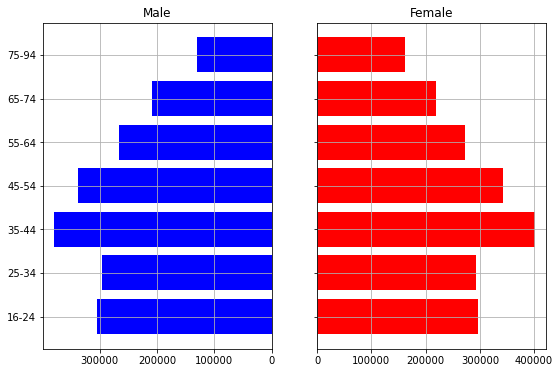

In [3]:
#Plot the number of males v females for each age group in the population
#see website https://www.statology.org/population-pyramid-python/ for pyramid subplot code

#Specify the x and y axis
y = range(len(df_population))
x_male = df_population['M']
x_female = df_population['F']

#Configure the chart
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
axes[0].barh(y, x_male, align='center', color='blue')
axes[0].set(title='Male')
axes[1].barh(y, x_female, align='center', color='red')
axes[1].set(title='Female')

#Define the 'Age group' for the chart and invert so that charts are mirroring
axes[0].set(yticks=y, yticklabels=df_population['Age_group'])
axes[0].invert_xaxis()
axes[0].grid()
axes[1].grid()

plt.show()

Using the df_population dataframe it is possible to calculate the percentage of the population that falls into each age group.

In [4]:
#Combine male/female population for each age group and show as percentage of population
df_population['gen_count'] = df_population['M'] + df_population['F']

#round population percentage to 3 decimal places
df_population['population%'] = round(df_population['gen_count']/df_population['gen_count'].sum(), 3)
df_population

,Age_group,M,F,gen_count,population%
0,16-24,305540,296180,601720,0.154
1,25-34,296129,292470,588599,0.151
2,35-44,379535,401001,780536,0.200
3,45-54,337318,342553,679871,0.174
4,55-64,266125,272459,538584,0.138
5,65-74,209153,218590,427743,0.109
6,75-94,130065,162024,292089,0.075


This study does not need the actual ages of the population but rather the population by age groups. It will be possible to generate this data using the random choice method. The population% column will also be used to assign a weighting for the popoulation size of each age group based on an overall sample size 10000.

In [5]:
age_list = df_population['Age_group'].to_numpy()
age_list

array(['16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-94'],
      dtype=object)

In [6]:
#Set the seed so that the pseudo-random data chosen is repeatable
np.random.seed(2)

#Rounding the population% to 3 decimal places - rounding to 0.150 for second item so sum of values equals 1
age_population = np.random.choice(age_list, 10000, p=[0.154, 0.150, 0.200, 0.174, 0.138, 0.109, 0.075])
age_population

array(['35-44', '16-24', '45-54', ..., '55-64', '55-64', '25-34'],
      dtype=object)

In [7]:
#Count the number of times each age-group appears(each value is representative of a person)
age_group_dict = {}

for i in age_population: 

    age_group_dict[i] = age_group_dict.get(i, 0) + 1
    age_group_dict = dict(sorted(age_group_dict.items()))
    
print(age_group_dict)

{'16-24': 1597, '25-34': 1554, '35-44': 2023, '45-54': 1660, '55-64': 1330, '65-74': 1071, '75-94': 765}


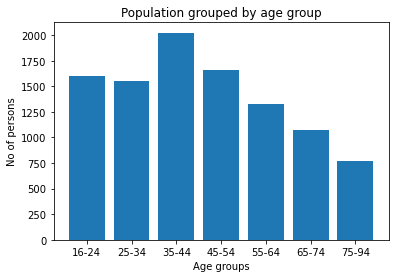

In [8]:
#Bar chart of the pseudo randomly generated data for the population and age group
plt.bar(range(len(age_group_dict)), list(age_group_dict.values()))
plt.xticks(range(len(age_group_dict)), list(age_group_dict.keys()))

plt.title("Population grouped by age group")
plt.xlabel("Age groups")
plt.ylabel("No of persons")

plt.show()

#Assistance on plotting chart using a dictionary found at
#https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary

The bar chart above follows a similiar pattern to the actual population and how it is distributed between each age group in Ireland.

In [9]:
#Preparing the simulated dataset
cvd_sim = pd.DataFrame.from_dict(age_group_dict, orient='index')
cvd_sim.columns=(['sim_pop'])

#Reference to orient='index' found at https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/

In [10]:
#Reset the index so that age_group is a category 
#https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv
cvd_sim = cvd_sim.reset_index()

In [11]:
cvd_sim.columns=(['age_group', 'sim_pop'])
cvd_sim

,age_group,sim_pop
0,16-24,1597
1,25-34,1554
2,35-44,2023
3,45-54,1660
4,55-64,1330
5,65-74,1071
6,75-94,765


***

## Variable 2: Gender

Using the Ireland-2020 population pyramid dataset as the primary reference point it would appear that the gender ratio of male to female for each age group is very similiar. However the background reseach used in the introduction of this project and published in the British Heart Foundation and indicates that females are possibly at higher risk above 85 years of age from dying due to the disease. A gender weighting for each age group will therefore be included when generating the pseudo-random data for this category.

<b>Gender weighting:</b> This is determined based on the number of males to females for each age group using the Ireland-2020 dataset as the reference point. 

In [12]:
#Convert simulated population age groupings to array
sim_pop_arr = cvd_sim['sim_pop'].to_numpy()
sim_pop_arr

array([1597, 1554, 2023, 1660, 1330, 1071,  765], dtype=int64)

In [13]:
#Determine male/female weighting based on the Ireland 2020 dataset for each age group
gend_prob = (round(((df_population['M']/df_population['F'])/2), 2)).to_numpy()
gend_prob

array([0.52, 0.51, 0.47, 0.49, 0.49, 0.48, 0.4 ])

In [14]:
#Create array that includes the simulated no. of males for each age group
sim_male = []
#Set seed sequence so results are repeatable
seed_seq = np.random.SeedSequence(44)

for pop, prob in zip(sim_pop_arr, gend_prob):

    m = np.random.default_rng(seed_seq).binomial(pop, prob, 1)
    sim_male.append(m)

sim_male

#Reference https://pythonbasics.org/pandas-iterate-dataframe/ for example on applying the zip method

[array([834], dtype=int64),
 array([797], dtype=int64),
 array([947], dtype=int64),
 array([809], dtype=int64),
 array([649], dtype=int64),
 array([511], dtype=int64),
 array([304], dtype=int64)]

In [15]:
#Convert to numpy array
sim_male_arr = np.array(sim_male)
sim_male_arr

array([[834],
       [797],
       [947],
       [809],
       [649],
       [511],
       [304]], dtype=int64)

In [16]:
#Convert 2d array to 1d using flatten method
#https://thispointer.com/python-convert-matrix-2d-numpy-array-to-a-1d-numpy-array/#:~:text=Convert%202D%20Numpy%20array%20to%201D%20Numpy%20array,a%20flatten%201D%20view%20of%20the%20input%20array%2C
sim_male_flat = sim_male_arr.flatten()
sim_male_flat

array([834, 797, 947, 809, 649, 511, 304], dtype=int64)

In [17]:
#Change array to pandas Series
sim_male_flat = pd.Series(sim_male_flat)

#Add the series to the simulated dataset
#This is the simulated amount of males per age group generated using random binomial method
cvd_sim['male'] = sim_male_flat

#This is the simulated amount of females per age group
cvd_sim['female'] = cvd_sim['sim_pop'] - cvd_sim['male']

cvd_sim

,age_group,sim_pop,male,female
0,16-24,1597,834,763
1,25-34,1554,797,757
2,35-44,2023,947,1076
3,45-54,1660,809,851
4,55-64,1330,649,681
5,65-74,1071,511,560
6,75-94,765,304,461


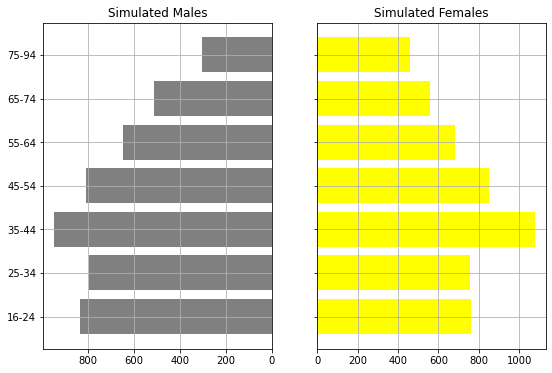

In [18]:
#Plot the number of males v females for each age group in the simulated population

#Specify the x and y axis
y1 = range(len(cvd_sim))
sim_male = cvd_sim['male']
sim_female = cvd_sim['female']

#Configure the chart
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
axes[0].barh(y1, sim_male, align='center', color='grey')
axes[0].set(title='Simulated Males')
axes[1].barh(y1, sim_female, align='center', color='yellow')
axes[1].set(title='Simulated Females')

#Define the 'Age group' for the chart and invert so that charts are mirroring
axes[0].set(yticks=y, yticklabels=cvd_sim['age_group'])
axes[0].invert_xaxis()
axes[0].grid()
axes[1].grid()

plt.show()

***
## Variable 3: Tobacco use
   
Using the article published in the British Heart Foundation as a reference it would appear that the percentage of male and female smokers for each age group is very similiar. For the purposes of this project it will be assumed that the same percentage use tobacco in each age group. Figures for smoker_pct taken from the table in section "Smoker vs non-smoker". 

In [19]:
#The percentage of smokers per age group - taken from article published by the British Heart Found
#See Smoker vs non-smoker section above
smoker_pct = [0.18, 0.22, 0.20, 0.22, 0.16, 0.12, 0.05]
smoker_pct_arr = np.array(smoker_pct)
smoker_pct_arr

array([0.18, 0.22, 0.2 , 0.22, 0.16, 0.12, 0.05])

In [20]:
#Convert simulated population gender groupings to array
sim_m_arr = cvd_sim['male'].to_numpy()
sim_f_arr = cvd_sim['female'].to_numpy()

In [21]:
#Create array that includes the simulated no. of smokers for both genders for each age group
sim_m_smoker = []
sim_f_smoker = []

#Set seed sequence so results are repeatable
seed_seq2 = np.random.SeedSequence(88)

for prob, m_smoke, f_smoke in zip(smoker_pct_arr, sim_m_arr, sim_f_arr):

    d = np.random.default_rng(seed_seq2).binomial(m_smoke, prob, 1)
    sim_m_smoker.append(d)
    
    e = np.random.default_rng(seed_seq2).binomial(f_smoke, prob, 1)
    sim_f_smoker.append(e)

print(sim_m_smoker)
print(sim_f_smoker)

[array([143], dtype=int64), array([167], dtype=int64), array([180], dtype=int64), array([170], dtype=int64), array([99], dtype=int64), array([58], dtype=int64), array([12], dtype=int64)]
[array([130], dtype=int64), array([158], dtype=int64), array([205], dtype=int64), array([179], dtype=int64), array([103], dtype=int64), array([64], dtype=int64), array([19], dtype=int64)]


In [22]:
#Convert to numpy array
sim_m_smoker_arr = np.array(sim_m_smoker)
sim_f_smoker_arr = np.array(sim_f_smoker)

In [23]:
#Change to 1d arrays
sim_m_smoker_flat = sim_m_smoker_arr.flatten()
sim_f_smoker_flat = sim_f_smoker_arr.flatten()

In [24]:
#Change to pandas Series
sim_m_smoker_flat = pd.Series(sim_m_smoker_flat)
sim_f_smoker_flat = pd.Series(sim_f_smoker_flat)

#Add to the simulated dataset
cvd_sim['m_smoker'] = sim_m_smoker_flat
cvd_sim['f_smoker'] = sim_f_smoker_flat

cvd_sim

,age_group,sim_pop,male,female,m_smoker,f_smoker
0,16-24,1597,834,763,143,130
1,25-34,1554,797,757,167,158
2,35-44,2023,947,1076,180,205
3,45-54,1660,809,851,170,179
4,55-64,1330,649,681,99,103
5,65-74,1071,511,560,58,64
6,75-94,765,304,461,12,19


***
## Variable 4: Weight



***
## Reassessing the dataset:

When generating the simulated data in the variable sections above it was assumed that it would be a simple task to use that data to populate the entire dataset using values. However this has not been straight forward. As time is running out for completing project and in order to progress, Variable 4: Weight will not be complete until the data in Variables 1/2/3 has been converted into the actual format to be submitted as part of the final dataset.

### df_cvd['age_group']:

At first it was not clear how to create the df_cvd['age_group'] column so that it would use the same values generated in the Variable 1. Using a for loop to loop through age_list[i] and sim_pop_arr[i] worked however it was clearly inefficient.

Research online led to a more efficient way to create df_cvd['age_group'] which allowed using the age group sizes generated in Variable 1:

In [25]:
#Using the age_population data generated in Variable 1
age_population_final = age_population
age_population_final = pd.Series(age_population_final)

df_cvd = pd.DataFrame(age_population_final.sort_values(ascending=True), columns=['age_group'])
#Sorting the DataFrame at https://data-flair.training/blogs/sort-pandas-dataframes-series-array/

df_cvd = df_cvd.reset_index(drop=True)
#Reset the index at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame

df_cvd

,age_group
0,16-24
1,16-24
2,16-24
3,16-24
4,16-24
...,...
9995,75-94
9996,75-94
9997,75-94
9998,75-94


### df_cvd['gender']:

It has not been possible to multiply the number of males and females for each age group using the data generated in Variable 2. The difficulty has been around retrieving individual pieces of data for each binomial test. It had been planned to assign a weighting for male to females for each age group as is done in Variable 2 however it was not possible to convert this into an array of 10000 values. For this reason it will be assumed that the female and male population is evenly distributed for all age groups rather than the weightings used in 'gend_prob' array above.

In [26]:
#Assume the population sizes of female/male is evenly distributed 
probability = .5

#num of flips required. This can be changed.
pop_size = 10000

#initiate array
gender_result = np.arange(pop_size)

In [27]:
#Guidance for creating array of 1's and 0's when using the random binomial method
#found on webpage https://reginaoftech.com/how-to-code-a-fair-coin-flip-in-python/

def male_fem(p):    
      
    #perform the binomial distribution (returns 0 ('female') or 1 ('male'))    
    gend_pick = np.random.default_rng().binomial(1,p, 1) 
       
    #return value to be added to numpy array    
    return gend_pick

#run pop_size test at required probability set above
for i in range(pop_size):    
    gender_result[i] = male_fem(probability)
    i+=1

#Convert array of 1's and 0's to male and females
gender_result = ['male' if x == 1 else 'female' for x in gender_result]

In [28]:
df_cvd['gender'] = gender_result
df_cvd

,age_group,gender
0,16-24,female
1,16-24,male
2,16-24,female
3,16-24,male
4,16-24,female
...,...,...
9995,75-94,female
9996,75-94,male
9997,75-94,female
9998,75-94,male
